# Discharge curve analysis for HSE06 calculations

In [1]:
%aiida
from toolchest.hull import get_relax_record_single, get_relax_records, get_entry, remove_composition_from_entries
from aiida.orm import StructureData
plt.style.use('../publication_mp_style')
plt.rcParams['figure.dpi'] = 96

In [2]:
group = Group.objects.get(label='lifeoxf2/deli-ggau-lowests/hse-relaxes')

In [3]:
q = QueryBuilder()
q.append(Group, filters={'id': group.id})
q.append(WorkChainNode, with_group=Group,filters={'attributes.exit_status': {'in': [0, 601]}})
q.all()

[[<WorkChainNode: uuid: b00f059d-ac40-41b4-b0d4-b4b011830c86 (pk: 614757) (aiida.workflows:vaspu.relax)>],
 [<WorkChainNode: uuid: e8e26349-6795-4b2e-acdb-e9a86154b380 (pk: 614729) (aiida.workflows:vaspu.relax)>],
 [<WorkChainNode: uuid: 7f574717-babf-447a-a819-267dbabb0322 (pk: 614701) (aiida.workflows:vaspu.relax)>],
 [<WorkChainNode: uuid: 2d4b4f61-0574-4a32-b327-ddfb671ecb00 (pk: 614772) (aiida.workflows:vaspu.relax)>],
 [<WorkChainNode: uuid: 4da12b2e-d41b-44f0-bbde-82782cefe4f5 (pk: 614744) (aiida.workflows:vaspu.relax)>],
 [<WorkChainNode: uuid: 97de282d-752c-49d6-87c9-138dadef0753 (pk: 614717) (aiida.workflows:vaspu.relax)>]]

In [4]:
from aiida_user_addons.tools.pymatgen import get_entry_from_calc
from aiida_user_addons.process.battery import VoltageCurve
import toolchest.phase_diagram as tpd
from importlib import reload
reload(tpd)

<module 'toolchest.phase_diagram' from '/home/bonan/appdir/python-tools/toolchest/phase_diagram.py'>

In [7]:
hse_lithiated = load_node('45ac2a56-c429-4d2c-ae53-bf0b37f75f15')
hse_delithiated_1 = load_node('ad97e033-8c21-41a0-9bb1-1250a7601e10')
hse_delithiated_full = load_node('05d3e7ce-3b2b-4157-aeaf-7ae33b227e29')
hse_delithiated_7 = load_node('8cc383b1-2b89-42e1-8ff7-894185ecb478')

In [39]:
entries = []
for (work, ) in q.all():
    entries.append(get_entry_from_calc(work))
entries.extend([
    get_entry_from_calc(hse_lithiated),
    #get_entry_from_calc(hse_delithiated_1),
    get_entry_from_calc(hse_delithiated_full),
    #get_entry_from_calc(hse_delithiated_3),
    get_entry_from_calc(hse_delithiated_7)

])

In [40]:
li_ref_relax = load_node('fa59634a-7d2a-4c39-b52a-94a08067aafa')

li_ref = get_entry_from_calc(li_ref_relax)

curve = VoltageCurve(entries, li_ref)

In [10]:
view(curve.entries[-1].structure)

(-2.5, 0.5)

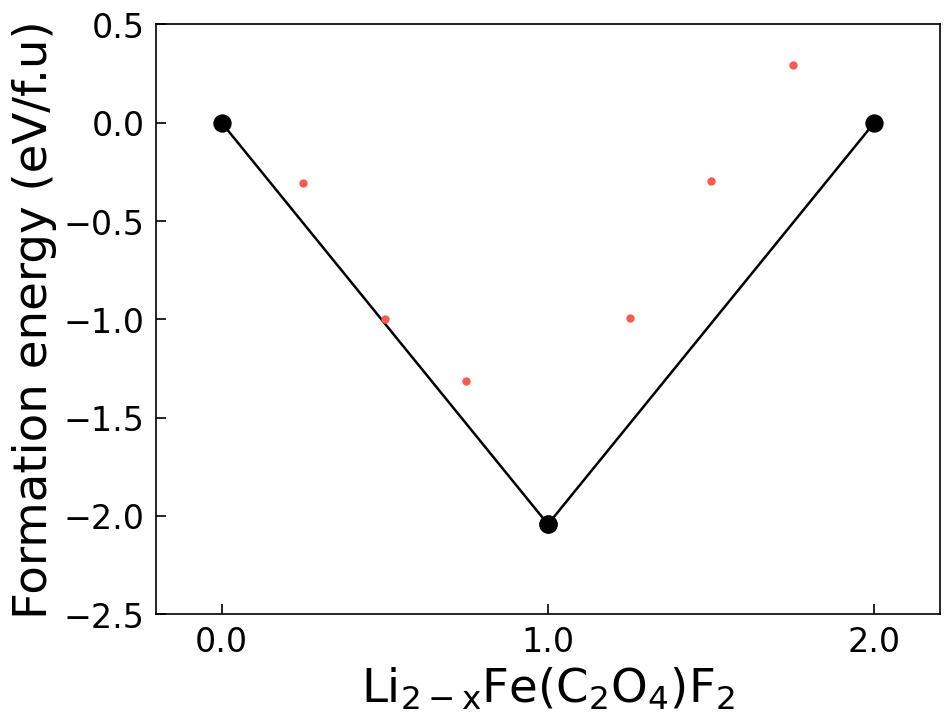

In [41]:
pdplotter = tpd.BetterMplPlotter(curve.phase_diagram, backend='matplotlib', markerfacecolor='k', markersize=10, 
                                 show_unstable=30.0)
pdplotter.get_plot(label_unstable=False, label_stable=False, energy_colormap=None, 
                   stable_label_size=20, no_polyanion=True)
plt.xlabel(r'$\mathrm{Li_{2-x}Fe(C_2O_4)F_2}$', fontsize=28)
ticks = np.array([0.0,0.5, 1.0])
plt.xticks(ticks, labels=ticks*2.0)
plt.tight_layout()
plt.ylim(-2.5, 0.5)

In [ ]:
## Combined

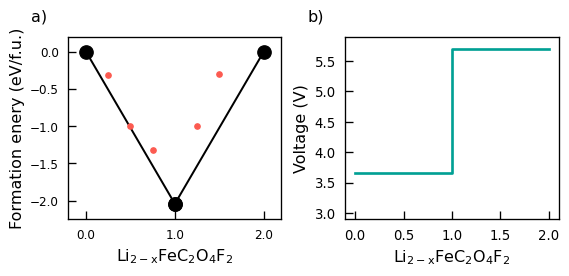

In [61]:
curve = VoltageCurve(entries, li_ref
            )


fig, ax = plt.subplots(1, 2, figsize=(6, 3))

curve.plot_voltages(ax=ax[1])
ax[1].lines[0].set_linewidth(2)
ax[1].set_xlabel(r'$\mathrm{Li_{2-x}FeC_2O_4F_2}$', fontsize=12)
plt.ylabel('Voltage (V)', fontsize=12)
plt.xticks(ticks=[0, 0.5, 1.0, 1.5, 2.0], fontsize=10)
plt.yticks(fontsize=10)


plt.sca(ax[0])
pdplotter = tpd.BetterMplPlotter(curve.phase_diagram, backend='matplotlib', markerfacecolor='k', markersize=10, 
                                 show_unstable=5.0)
pdplotter.get_plot(plt=plt, label_unstable=False, label_stable=False, energy_colormap=None, 
                   stable_label_size=12, no_polyanion=True)
ax[0].set_xlabel(r'$\mathrm{Li_{2-x}FeC_2O_4F_2}$', fontsize=12)
plt.ylabel(r'Formation enery (eV/f.u.)', fontsize=12)

ticks = np.array([0.0,0.5, 1.0])
plt.xticks(ticks, labels=ticks*2.0)
plt.tight_layout()
ax[1].set_ylim(2.9, 5.9)

ax[0].text(-0.1, 1.15, 'a)', transform=ax[0].transAxes,
      fontsize=12, va='top', ha='right')

ax[1].text(-0.1, 1.15, 'b)', transform=ax[1].transAxes,
      fontsize=12, va='top', ha='right')

fig.tight_layout()
fig.savefig('voltage_profile-hse06.svg')
fig.savefig('voltage_profile-hse06.png', dpi=200)
fig.savefig('voltage-profile-li2feoxf2-hse06.png', dpi=200)


## Deposit into a dedicated group for further study
e.g. relaxation using HSE06

In [12]:
from toolchest.battery.metrics import TheoreticalCathode

catf = TheoreticalCathode('Li2FeC2O4F2', nli=1, avg_voltage=3.52)

cat = TheoreticalCathode('Li2FeC4O8', nli=1, avg_voltage=3.9)

print(cat.comp.reduced_formula, cat.Whkg)

print(cat.comp.reduced_formula, cat.mAhg)

print(catf.comp.reduced_formula, catf.Whkg)
print(catf.comp.reduced_formula, catf.mAhg)

Li2Fe(CO2)4 425.3078237679626
Li2Fe(CO2)4 109.05328814563144
Li2FeC2(O2F)2 481.9651670791162
Li2FeC2(O2F)2 136.921922465658


## C-C bond length

In [19]:
from aiida_user_addons.process.battery import DelithiationManager

from pymatgen.io.ase import AseAtomsAdaptor

def get_cc_bond_lengths(atoms):
    """Return the CC bond lenghs for an Atoms object. Assume each C has one C-C bond"""
    only_c = atoms[atoms.numbers == 6]
    dmat = only_c.get_all_distances(mic=True)
    dmat[dmat == 0.] = 999
    min_cc = dmat.min(axis=1)
    return min_cc

all_atoms = []
levels = []
mean_bonds = []


for entry in curve.entries:
    atoms = AseAtomsAdaptor.get_atoms(entry.structure)
    man = DelithiationManager(entry.structure)
    level = man.lithiation_level
    levels.append(level)
    bonds = get_cc_bond_lengths(atoms)
    all_atoms.append(atoms)
    mean_bond = bonds.mean()
    mean_bonds.append(mean_bond)
    #print(mean_bond, entry.composition.reduced_formula)

In [22]:
import pandas as pd

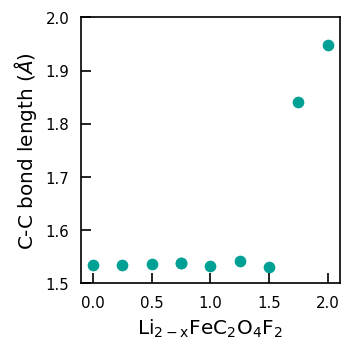

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))

plt.scatter(2 - np.array(levels), mean_bonds)
plt.xlabel(r'$\mathrm{Li_{2-x}FeC_2O_4F_2}$',fontsize=12)
plt.ylabel(r'C-C bond length ($\AA$)', fontsize=12)
ax.set_ylim(1.50, 2.0)

plt.tight_layout()

plt.savefig('c-c-bond-hse06.svg')
plt.savefig('../paper-plots/c-c-bond-hse06.svg')
plt.savefig('../paper-plots/c-c-bond-hse06.png', dpi=200)


frame = pd.DataFrame({'li_level': 2 - np.array(levels), 'mean_bonds': mean_bonds})
frame.to_csv('hse06-c-c-bonds.csv')

## Read site projected magneitsations

Site projected magnetisation can be useful for analyse the oxidation states

In [43]:
from parsevasp.outcar import Outcar
plt.rcParams['figure.dpi'] = 120
import aiida.orm as orm

def get_magnetic_dict(relax):
    
    """
    Find the average site project magnetisation for each speice
    """
    q = QueryBuilder()
    q.append(Node, filters={'id': relax.id})
    q.append(Dict, tag='misc')
    q.append(CalcJobNode, with_outgoing='misc')
    q.append(orm.FolderData, project=['*'])
    q.append(orm.StructureData, with_outgoing=CalcJobNode, project=['*'])
    folder, struct = q.one()
    symbols = [s.kind_name for s in struct.sites]
    with folder.open('OUTCAR') as fh:
        parser = Outcar(file_handler=fh)
    magdict = parser.get_magnetization()
    return magdict

def magnetisation_by_specie(relax):
    """
    Find the average site project magnetisation for each speice
    """
    q = QueryBuilder()
    q.append(Node, filters={'id': relax.id})
    q.append(Dict, tag='misc')
    q.append(CalcJobNode, with_outgoing='misc')
    q.append(orm.FolderData, project=['*'])
    q.append(orm.StructureData, with_outgoing=CalcJobNode, project=['*'])
    folder, struct = q.one()
    symbols = [s.kind_name for s in struct.sites]
    with folder.open('OUTCAR') as fh:
        parser = Outcar(file_handler=fh)
    magdict = parser.get_magnetization()
    
    site_moments = magdict['sphere']['x']['site_moment']
    # Sum for each specie
    result = {key: 0.0 for key in set(symbols)}
    for idx, value in site_moments.items():
        symbol = symbols[idx-1]
        result[symbol] += value['tot']
    # Divid by counts of each specie
    comp = struct.get_pymatgen().composition
    for key in result.keys():
        result[key] /= comp[key]
    return result

In [44]:
for entry in entries:
    entry.parameters['mag_dict'] = get_magnetic_dict(load_node(entry.parameters['calc_uuid'])) 
    entry.parameters['fe_mag'] =  magnetisation_by_specie(load_node(entry.parameters['calc_uuid']))['Fe']

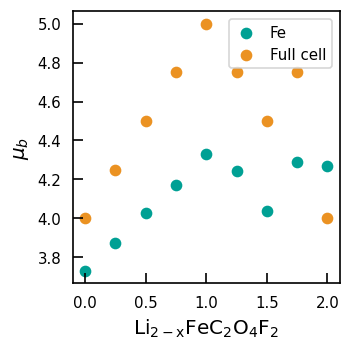

In [45]:
# Extract and plot the magnetisations
all_atoms = []
levels = []
fe_mag = []
tot_mag = []

for entry in curve.entries:
    atoms = AseAtomsAdaptor.get_atoms(entry.structure)
    man = DelithiationManager(entry.structure)
    level = man.lithiation_level
    levels.append(level)
    all_atoms.append(atoms)
    fe_mag.append(entry.parameters['fe_mag'])
    nfe = entry.structure.composition['Fe']
    tot_mag.append(entry.parameters['mag_dict']['full_cell'][0] / nfe)



fig, ax = plt.subplots(1, 1, figsize=(3,3))

plt.scatter(2 - np.array(levels), fe_mag, label='Fe')
plt.ylabel(r'$\mu_b$', fontsize=12)
    
plt.scatter(2 - np.array(levels), tot_mag, label='Full cell')
plt.xlabel(r'$\mathrm{Li_{2-x}FeC_2O_4F_2}$', fontsize=12)
plt.legend()

plt.tight_layout()

plt.savefig('fe-magnetisation-hse06.svg')
plt.savefig('fe-magnetisation-hse06.svg')
plt.savefig('fe-magnetisation-hse06.png', dpi=200)

frame = pd.DataFrame({'li_level': 2 - np.array(levels), 'fe_mag': fe_mag, 'tot_mag': tot_mag})
frame.to_csv('hse-mags.csv')

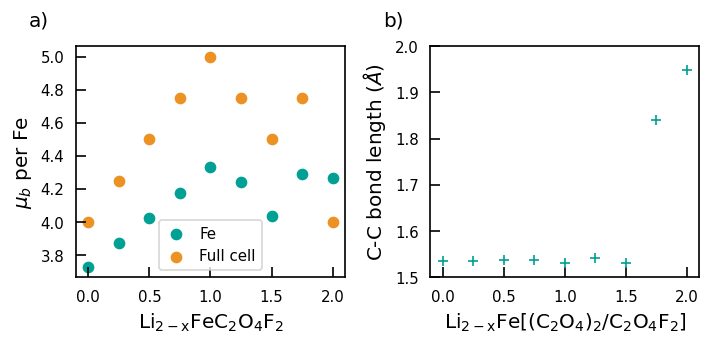

In [47]:
# Part1: Extract and plot the magnetisations

#lowest = delithiated.loc[delithiated.groupby('formula').energy.idxmin()]


# Extract and plot the magnetisations
all_atoms = []
levels = []
fe_mag = []
tot_mag = []
mean_bonds = []
for entry in curve.entries:
    atoms = AseAtomsAdaptor.get_atoms(entry.structure)
    man = DelithiationManager(entry.structure)
    level = man.lithiation_level
    levels.append(level)
    all_atoms.append(atoms)
    fe_mag.append(entry.parameters['fe_mag'])
    nfe = entry.structure.composition['Fe']
    tot_mag.append(entry.parameters['mag_dict']['full_cell'][0] / nfe)
    bonds = get_cc_bond_lengths(atoms)
    mean_bond = bonds.mean()
    mean_bonds.append(mean_bond)
    #print(row['fe-mag'], entry.composition.reduced_formula)

latex_li2feoxf2 = r'$\mathrm{Li_{2-x}FeC_2O_4F_2}$'
latex_li2feox2 = r'$\mathrm{Li_{2-x}Fe(C_2O_4)_2}$'

fig, ax = plt.subplots(1, 2, figsize=(6,3))


ax[0].scatter(2 - np.array(levels), fe_mag, label='Fe')
ax[0].set_ylabel(r'$\mu_b$ per Fe', fontsize=12)
    
ax[0].scatter(2- np.array(levels), tot_mag, label='Full cell')
ax[0].set_xlabel(latex_li2feoxf2, fontsize=12)
ax[0].legend()

ax[1].plot(2 - np.array(levels), mean_bonds, '+', label=latex_li2feoxf2)
ax[1].set_xlabel(r'$\mathrm{Li_{2-x}Fe[(C_2O_4)_2/C_2O_4F_2}]$', fontsize=12)
ax[1].set_ylabel(r'C-C bond length ($\AA$)', fontsize=12)
ax[1].set_ylim(1.50, 2.0)

ax[0].text(-0.1, 1.15, 'a)', transform=ax[0].transAxes,
      fontsize=12, va='top', ha='right')

ax[1].text(-0.1, 1.15, 'b)', transform=ax[1].transAxes,
      fontsize=12, va='top', ha='right')

fig.tight_layout()

fig.savefig('cc-and-mag-combined-hse06.svg')
fig.savefig('cc-and-mag-combined-hse06.svg', dpi=200)
